In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('Style.mplstyle')
import pandas as pd
import matplotlib.dates as mdates
import os
import sys
from matplotlib.ticker import FuncFormatter
import time
from datetime import datetime, timedelta
import matplotlib.dates as mdates
sys.path.append('..')
from read_data_functions import *
from plot_functions import*
from calculations import *

In [2]:
# Define paths and parameters
parent_LCS = '../../../'
path_LCS = 'L:/PG-Nanoteknologi/PROJEKTER/2024 Laura og Nan/pilot kbh hovedbanegaard and noerregade/rawdata/particle/LCS/'
names_LCS = ['LCS0076', 'LCS0104']

# Read the LCS data
data = read_LCS_data(path_LCS, parent_LCS, 'timestamp', 0)
data['Wind Direction']['Conc'] = pd.to_numeric(data['Wind Direction']['Conc'], errors='coerce')

# Debug: Print available keys in the data
print("Available keys in data:", data.keys())

# Display the data for 'LCS0076' if it exists
if 'LCS0076' in data:
    display(data['LCS0076'])
else:
    print("LCS0076 data is not available.")

Available keys in data: dict_keys(['Carbon Dioxide', 'Carbon Monoxide', 'LCS0076', 'LCS0104', 'Nitrogen Dioxide', 'PM25', 'Relative Humidity', 'Temperature', 'Wind Direction'])


,timestamp,GNSS_LAT,GNSS_LON,SHTC3_RH,SHTC3_T,SPS30_PM1,SPS30_PM10,SPS30_PM2.5,SPS30_PM4,SPS30_PN0.5,...,SPS30_PN10,SPS30_PN2.5,SPS30_PN4,VEML6040_AL,VEML6040_Blue,VEML6040_ColorTemp,VEML6040_Green,VEML6040_RED,VEML6040_White,signalQuality
0,2024-09-16 00:00:00,55.70170975,12.5458498,33.86,28.04,0.71,0.98,0.85,0.93,4.73,...,5.66,5.63,5.65,11.65,107,35918,293,127,343,18
1,2024-09-16 00:05:00,55.70170975,12.5458498,33.86,28.03,1.26,1.56,1.44,1.52,8.53,...,10.08,10.05,10.07,12.53,109,31111,326,136,375,18
2,2024-09-16 00:10:00,55.70190811,12.5458498,33.86,28.03,0.74,1.43,1.07,1.31,4.59,...,5.96,5.89,5.95,12.52,109,28551,326,135,373,18
3,2024-09-16 00:15:00,55.70215988,12.54559994,33.82,28.05,0.86,1.88,1.34,1.70,4.98,...,6.92,6.80,6.90,12.53,109,34447,326,136,374,18
4,2024-09-16 00:20:00,55.70215988,12.54559994,33.83,28.04,1.75,2.26,2.03,2.18,11.66,...,13.95,13.90,13.94,12.53,109,32531,326,136,374,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,2024-09-19 19:55:00,NaN,NaN,37.07,31.48,1.65,2.68,2.16,2.50,10.63,...,13.25,13.13,13.22,12.15,126,12484,374,217,449,26
4517,2024-09-19 19:56:00,NaN,NaN,37.07,31.48,1.76,2.39,2.10,2.29,11.64,...,14.07,14.00,14.06,12.13,127,13909,373,218,449,26
4518,2024-09-19 19:57:00,NaN,NaN,36.96,31.54,2.19,2.71,2.49,2.64,14.78,...,17.50,17.44,17.49,12.10,129,15545,375,220,450,26
4519,2024-09-19 19:58:00,NaN,NaN,37.01,31.51,1.81,2.70,2.27,2.56,11.62,...,14.51,14.41,14.49,12.14,125,12992,373,217,449,26


  agg_filter: a filter function, which takes a (m, n, 3) float array and a dpi value, and returns a (m, n, 3) array and two offsets from the bottom left corner of the image
  alpha: scalar or None
  animated: bool
  backgroundcolor: color
  bbox: dict with properties for `.patches.FancyBboxPatch`
  clip_box: `.Bbox`
  clip_on: bool
  clip_path: Patch or (Path, Transform) or None
  color or c: color
  figure: `.Figure`
  fontfamily or family: {FONTNAME, 'serif', 'sans-serif', 'cursive', 'fantasy', 'monospace'}
  fontproperties or font or font_properties: `.font_manager.FontProperties` or `str` or `pathlib.Path`
  fontsize or size: float or {'xx-small', 'x-small', 'small', 'medium', 'large', 'x-large', 'xx-large'}
  fontstretch or stretch: {a numeric value in range 0-1000, 'ultra-condensed', 'extra-condensed', 'condensed', 'semi-condensed', 'normal', 'semi-expanded', 'expanded', 'extra-expanded', 'ultra-expanded'}
  fontstyle or style: {'normal', 'italic', 'oblique'}
  fontvariant or var

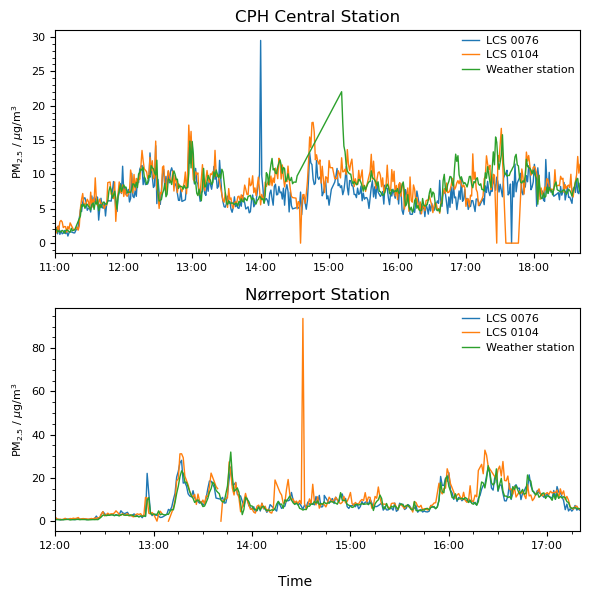

  agg_filter: a filter function, which takes a (m, n, 3) float array and a dpi value, and returns a (m, n, 3) array and two offsets from the bottom left corner of the image
  alpha: scalar or None
  animated: bool
  backgroundcolor: color
  bbox: dict with properties for `.patches.FancyBboxPatch`
  clip_box: `.Bbox`
  clip_on: bool
  clip_path: Patch or (Path, Transform) or None
  color or c: color
  figure: `.Figure`
  fontfamily or family: {FONTNAME, 'serif', 'sans-serif', 'cursive', 'fantasy', 'monospace'}
  fontproperties or font or font_properties: `.font_manager.FontProperties` or `str` or `pathlib.Path`
  fontsize or size: float or {'xx-small', 'x-small', 'small', 'medium', 'large', 'x-large', 'xx-large'}
  fontstretch or stretch: {a numeric value in range 0-1000, 'ultra-condensed', 'extra-condensed', 'condensed', 'semi-condensed', 'normal', 'semi-expanded', 'expanded', 'extra-expanded', 'ultra-expanded'}
  fontstyle or style: {'normal', 'italic', 'oblique'}
  fontvariant or var

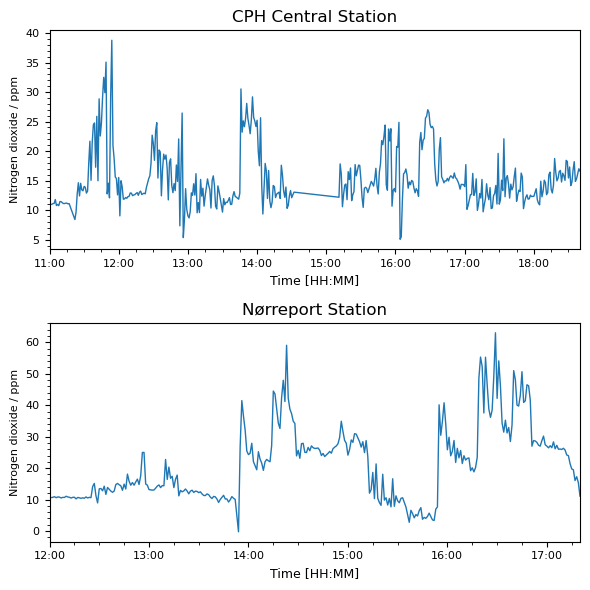

  agg_filter: a filter function, which takes a (m, n, 3) float array and a dpi value, and returns a (m, n, 3) array and two offsets from the bottom left corner of the image
  alpha: scalar or None
  animated: bool
  backgroundcolor: color
  bbox: dict with properties for `.patches.FancyBboxPatch`
  clip_box: `.Bbox`
  clip_on: bool
  clip_path: Patch or (Path, Transform) or None
  color or c: color
  figure: `.Figure`
  fontfamily or family: {FONTNAME, 'serif', 'sans-serif', 'cursive', 'fantasy', 'monospace'}
  fontproperties or font or font_properties: `.font_manager.FontProperties` or `str` or `pathlib.Path`
  fontsize or size: float or {'xx-small', 'x-small', 'small', 'medium', 'large', 'x-large', 'xx-large'}
  fontstretch or stretch: {a numeric value in range 0-1000, 'ultra-condensed', 'extra-condensed', 'condensed', 'semi-condensed', 'normal', 'semi-expanded', 'expanded', 'extra-expanded', 'ultra-expanded'}
  fontstyle or style: {'normal', 'italic', 'oblique'}
  fontvariant or var

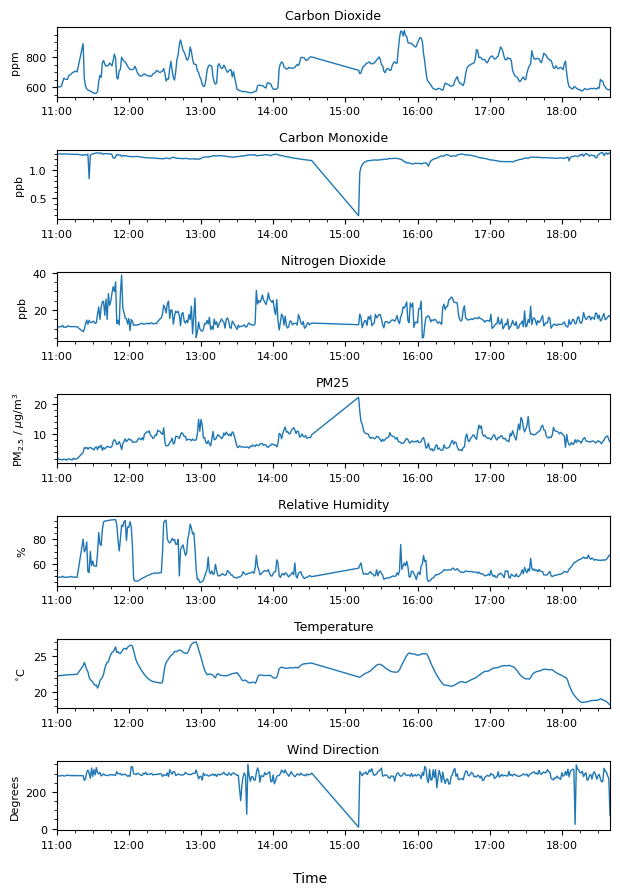

  agg_filter: a filter function, which takes a (m, n, 3) float array and a dpi value, and returns a (m, n, 3) array and two offsets from the bottom left corner of the image
  alpha: scalar or None
  animated: bool
  backgroundcolor: color
  bbox: dict with properties for `.patches.FancyBboxPatch`
  clip_box: `.Bbox`
  clip_on: bool
  clip_path: Patch or (Path, Transform) or None
  color or c: color
  figure: `.Figure`
  fontfamily or family: {FONTNAME, 'serif', 'sans-serif', 'cursive', 'fantasy', 'monospace'}
  fontproperties or font or font_properties: `.font_manager.FontProperties` or `str` or `pathlib.Path`
  fontsize or size: float or {'xx-small', 'x-small', 'small', 'medium', 'large', 'x-large', 'xx-large'}
  fontstretch or stretch: {a numeric value in range 0-1000, 'ultra-condensed', 'extra-condensed', 'condensed', 'semi-condensed', 'normal', 'semi-expanded', 'expanded', 'extra-expanded', 'ultra-expanded'}
  fontstyle or style: {'normal', 'italic', 'oblique'}
  fontvariant or var

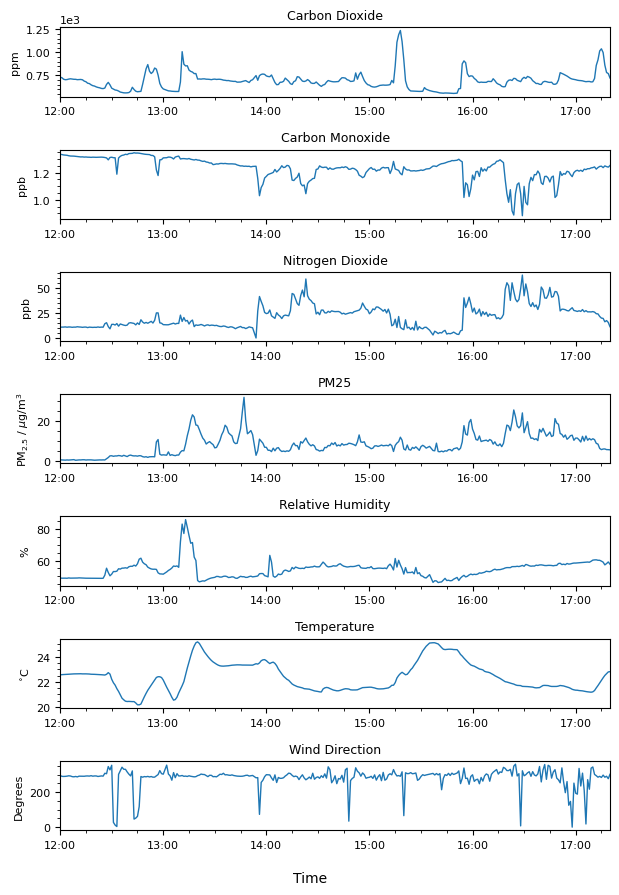

In [3]:
start_time = ['2024-09-17 11:00', '2024-09-19 12:00']
end_time = ['2024-09-17 18:40', '2024-09-19 17:20']
titles = ['CPH Central Station', 'Nørreport Station']
WS_keys = ['Carbon Dioxide', 'Carbon Monoxide', 'Nitrogen Dioxide', 'PM25', 'Relative Humidity', 'Temperature', 'Wind Direction']
WS_ylabels = ['ppm', 'ppb', 'ppb', 'PM$_{2.5}$ / $\mu$g/m$^{3}$', '%', '$^{\circ}$C', 'Degrees']

# PM2.5
fig, ax = plt.subplots(2,1, figsize = (6, 6))

plot_LCS_WS(ax, fig, data, start_time, end_time, titles)

fig.tight_layout()
fig.savefig('LCS_WS.png')
plt.show()

# Nitrogen dioxide
fig2, ax2 = plt.subplots(2,1, figsize = (6, 6))

plot_LCS_single(ax2[0], data, 'Nitrogen Dioxide', start_time[0], end_time[0], 'Conc', 'Nitrogen dioxide / ppm')
ax2[0].set(xlabel = 'Time [HH:MM]', title = titles[0])
plot_LCS_single(ax2[1], data, 'Nitrogen Dioxide', start_time[1], end_time[1], 'Conc', 'Nitrogen dioxide / ppm')
ax2[1].set(xlabel = 'Time [HH:MM]', title = titles[1])

fig2.tight_layout()
fig2.savefig('LCS_NO2.png', dpi = 600)
plt.show()

# Weather station Hovedbanegården
fig3, ax3 = plt.subplots(7, 1, figsize = (6.3, 9))

plot_LCS(ax3, fig3, data, WS_keys, start_time[0], end_time[0], 'Conc', WS_ylabels)

fig3.tight_layout()
fig3.savefig('Weather station_Hovedbanegaarden.png', dpi = 600)
plt.show()

# Weather station Nørreport
fig4, ax4 = plt.subplots(7, 1, figsize = (6.3, 9))

plot_LCS(ax4, fig4, data, WS_keys, start_time[1], end_time[1], 'Conc', WS_ylabels)

fig4.tight_layout()
fig4.savefig('Weather station_Noerreport.png', dpi = 600)
plt.show()

In [5]:
# CPH Central:
timestamp = np.array(['11:36:', '11:48:', '11:54:', '12:01:', '12:39:', '12:50:', '12:56:', '13:11:', 
                       '13:30:', '13:45:', '13:49', '14:03:', '14:06:', '14:21', '14:24', '14:39', '14:42', '14:57', '15:00', '15:15', '15:18', '15:32', '15:40', '15:49',
                       '16:05', '16:20', '16:23', '16:38', '16:41', '16:56', '16:59', '17:14', '17:17', '17:32', '17:33', '17:50', '18:15', '18:27'], dtype = object)

LCS_mean_PM25 = mean_conc_LCS(data, ['LCS0076', 'LCS0104'], 'timestamp', '2024-09-17 ', timestamp, 'SPS30_PM2.5', 'LCS_PM25_CPHcentral.csv')
display(LCS_mean_PM25)

Indexes for LCS0076: [1419.    0. 1435. 1442. 1479. 1490. 1494. 1509. 1527. 1542. 1546. 1558.
 1561. 1576. 1579. 1593. 1596. 1611. 1614. 1626. 1629. 1643. 1650. 1658.
 1674. 1687. 1690. 1705.    0. 1722. 1725.    0. 1741. 1756. 1757. 1773.
 1798. 1808.]
Indexes for LCS0104: [1419. 1430. 1436. 1443. 1480.    0. 1495. 1510.    0. 1540. 1544. 1557.
 1560. 1575. 1578. 1591. 1594. 1609. 1612. 1626. 1629. 1643. 1649. 1658.
 1674. 1688. 1691. 1706. 1707. 1722. 1725. 1738. 1741.    0.    0. 1759.
 1784. 1795.]


,LCS0076 time start,LCS0076 time end,LCS0076,LCS0104 time start,LCS0104 time end,LCS0104
0,2024-09-17 11:36:00,2024-09-16 00:00:00,NaN,2024-09-17 11:36:00,2024-09-17 11:48:00,6.008182
1,2024-09-17 11:54:00,2024-09-17 12:01:00,7.581429,2024-09-17 11:54:00,2024-09-17 12:01:00,7.435714
2,2024-09-17 12:39:00,2024-09-17 12:50:00,8.737273,2024-09-17 12:39:00,2024-09-16 00:03:00,NaN
3,2024-09-17 12:56:00,2024-09-17 13:11:00,9.872000,2024-09-17 12:56:00,2024-09-17 13:11:00,10.770667
4,2024-09-17 13:30:00,2024-09-17 13:45:00,5.685333,2024-09-16 00:03:00,2024-09-17 13:45:00,1.795338
5,2024-09-17 13:49:00,2024-09-17 14:03:00,8.488333,2024-09-17 13:49:00,2024-09-17 14:03:00,7.856154
6,2024-09-17 14:06:00,2024-09-17 14:21:00,7.136667,2024-09-17 14:06:00,2024-09-17 14:21:00,9.862000
7,2024-09-17 14:24:00,2024-09-17 14:39:00,5.760000,2024-09-17 14:24:00,2024-09-17 14:39:00,6.518462
8,2024-09-17 14:42:00,2024-09-17 14:57:00,9.633333,2024-09-17 14:42:00,2024-09-17 14:57:00,12.642000
9,2024-09-17 15:00:00,2024-09-17 15:15:00,8.338333,2024-09-17 15:00:00,2024-09-17 15:15:00,10.459286


In [6]:
# CPH Central:
timestamp = np.array(['11:36:', '11:48:', '11:54:', '12:01:', '12:39:', '12:50:', '12:56:', '13:11:', 
                       '13:30:', '13:45:', '13:49', '14:03:', '14:06:', '14:21', '14:24', '14:39', '14:42', '14:57', '15:00', '15:15', '15:18', '15:32', '15:40', '15:49',
                       '16:05', '16:20', '16:23', '16:38', '16:41', '16:56', '16:59', '17:14', '17:17', '17:32', '17:33', '17:50', '18:15', '18:27'], dtype = object)

LCS_mean_PM1 = mean_conc_LCS(data, ['LCS0076', 'LCS0104'], 'timestamp', '2024-09-17 ', timestamp, 'SPS30_PM1', 'LCS_PM1_CPHcentral.csv')
display(LCS_mean_PM1)

Indexes for LCS0076: [1419.    0. 1435. 1442. 1479. 1490. 1494. 1509. 1527. 1542. 1546. 1558.
 1561. 1576. 1579. 1593. 1596. 1611. 1614. 1626. 1629. 1643. 1650. 1658.
 1674. 1687. 1690. 1705.    0. 1722. 1725.    0. 1741. 1756. 1757. 1773.
 1798. 1808.]
Indexes for LCS0104: [1419. 1430. 1436. 1443. 1480.    0. 1495. 1510.    0. 1540. 1544. 1557.
 1560. 1575. 1578. 1591. 1594. 1609. 1612. 1626. 1629. 1643. 1649. 1658.
 1674. 1688. 1691. 1706. 1707. 1722. 1725. 1738. 1741.    0.    0. 1759.
 1784. 1795.]


,LCS0076 time start,LCS0076 time end,LCS0076,LCS0104 time start,LCS0104 time end,LCS0104
0,2024-09-17 11:36:00,2024-09-16 00:00:00,NaN,2024-09-17 11:36:00,2024-09-17 11:48:00,5.484545
1,2024-09-17 11:54:00,2024-09-17 12:01:00,6.822857,2024-09-17 11:54:00,2024-09-17 12:01:00,6.551429
2,2024-09-17 12:39:00,2024-09-17 12:50:00,7.981818,2024-09-17 12:39:00,2024-09-16 00:03:00,NaN
3,2024-09-17 12:56:00,2024-09-17 13:11:00,8.924000,2024-09-17 12:56:00,2024-09-17 13:11:00,9.888667
4,2024-09-17 13:30:00,2024-09-17 13:45:00,5.204000,2024-09-16 00:03:00,2024-09-17 13:45:00,1.399383
5,2024-09-17 13:49:00,2024-09-17 14:03:00,7.765833,2024-09-17 13:49:00,2024-09-17 14:03:00,7.137692
6,2024-09-17 14:06:00,2024-09-17 14:21:00,6.470667,2024-09-17 14:06:00,2024-09-17 14:21:00,8.940667
7,2024-09-17 14:24:00,2024-09-17 14:39:00,5.195714,2024-09-17 14:24:00,2024-09-17 14:39:00,6.000000
8,2024-09-17 14:42:00,2024-09-17 14:57:00,8.922000,2024-09-17 14:42:00,2024-09-17 14:57:00,11.446667
9,2024-09-17 15:00:00,2024-09-17 15:15:00,7.690000,2024-09-17 15:00:00,2024-09-17 15:15:00,9.692143


In [7]:
# CPH Central:
timestamp = np.array(['11:36:', '11:48:', '11:54:', '12:01:', '12:39:', '12:50:', '12:56:', '13:11:', 
                       '13:30:', '13:45:', '13:49', '14:03:', '14:06:', '14:21', '14:24', '14:39', '14:42', '14:57', '15:00', '15:15', '15:18', '15:32', '15:40', '15:49',
                       '16:05', '16:20', '16:23', '16:38', '16:41', '16:56', '16:59', '17:14', '17:17', '17:32', '17:33', '17:50', '18:15', '18:27'], dtype = object)

WS_labels = ['Carbon Dioxide', 'Carbon Monoxide', 'Nitrogen Dioxide', 'PM25']
WS_mean = mean_conc_LCS(data, WS_labels, 'timestamp', '2024-09-17 ', timestamp, 'Conc', 'WS_CPHcentral.csv')
display(WS_mean)

Indexes for Carbon Dioxide: [1200. 1212. 1218. 1225. 1263. 1274. 1280. 1295. 1312. 1327. 1331. 1345.
 1348. 1363. 1366.    0.    0.    0.    0. 1379. 1382. 1396. 1404. 1413.
 1429. 1444. 1447. 1462. 1465. 1480. 1483. 1498. 1501. 1516. 1517. 1534.
 1559. 1571.]
Indexes for Carbon Monoxide: [1200. 1212. 1218. 1225. 1263. 1274. 1280. 1295. 1312. 1327. 1331. 1345.
 1348. 1363. 1366.    0.    0.    0.    0. 1379. 1382. 1396. 1404. 1413.
 1429. 1444. 1447. 1462. 1465. 1480. 1483. 1498. 1501. 1516. 1517. 1534.
 1559. 1571.]
Indexes for Nitrogen Dioxide: [1200. 1212. 1218. 1225. 1263. 1274. 1280. 1295. 1312. 1327. 1331. 1345.
 1348. 1363. 1366.    0.    0.    0.    0. 1379. 1382. 1396. 1404. 1413.
 1429. 1444. 1447. 1462. 1465. 1480. 1483. 1498. 1501. 1516. 1517. 1534.
 1559. 1571.]
Indexes for PM25: [1200. 1212. 1218. 1225. 1263. 1274. 1280. 1295. 1312. 1327. 1331. 1345.
 1348. 1363. 1366.    0.    0.    0.    0. 1379. 1382. 1396. 1404. 1413.
 1429. 1444. 1447. 1462. 1465. 1480. 1483. 1498. 1

,Carbon Dioxide time start,Carbon Dioxide time end,Carbon Dioxide,Carbon Monoxide time start,Carbon Monoxide time end,Carbon Monoxide,Nitrogen Dioxide time start,Nitrogen Dioxide time end,Nitrogen Dioxide,PM25 time start,PM25 time end,PM25
0,2024-09-17 11:36:00,2024-09-17 11:48:00,741.565740,2024-09-17 11:36:00,2024-09-17 11:48:00,1.291350,2024-09-17 11:36:00,2024-09-17 11:48:00,23.459167,2024-09-17 11:36:00,2024-09-17 11:48:00,5.835283
1,2024-09-17 11:54:00,2024-09-17 12:01:00,763.584246,2024-09-17 11:54:00,2024-09-17 12:01:00,1.257374,2024-09-17 11:54:00,2024-09-17 12:01:00,19.658571,2024-09-17 11:54:00,2024-09-17 12:01:00,7.413213
2,2024-09-17 12:39:00,2024-09-17 12:50:00,821.643949,2024-09-17 12:39:00,2024-09-17 12:50:00,1.213568,2024-09-17 12:39:00,2024-09-17 12:50:00,16.186364,2024-09-17 12:39:00,2024-09-17 12:50:00,9.207698
3,2024-09-17 12:56:00,2024-09-17 13:11:00,686.263334,2024-09-17 12:56:00,2024-09-17 13:11:00,1.230271,2024-09-17 12:56:00,2024-09-17 13:11:00,10.942000,2024-09-17 12:56:00,2024-09-17 13:11:00,9.579305
4,2024-09-17 13:30:00,2024-09-17 13:45:00,570.682593,2024-09-17 13:30:00,2024-09-17 13:45:00,1.264718,2024-09-17 13:30:00,2024-09-17 13:45:00,11.659333,2024-09-17 13:30:00,2024-09-17 13:45:00,5.871397
5,2024-09-17 13:49:00,2024-09-17 14:03:00,606.584917,2024-09-17 13:49:00,2024-09-17 14:03:00,1.276025,2024-09-17 13:49:00,2024-09-17 14:03:00,24.485714,2024-09-17 13:49:00,2024-09-17 14:03:00,6.456259
6,2024-09-17 14:06:00,2024-09-17 14:21:00,736.953805,2024-09-17 14:06:00,2024-09-17 14:21:00,1.237902,2024-09-17 14:06:00,2024-09-17 14:21:00,13.405333,2024-09-17 14:06:00,2024-09-17 14:21:00,10.781658
7,2024-09-17 14:24:00,2024-09-16 15:29:00,NaN,2024-09-17 14:24:00,2024-09-16 15:29:00,NaN,2024-09-17 14:24:00,2024-09-16 15:29:00,NaN,2024-09-17 14:24:00,2024-09-16 15:29:00,NaN
8,2024-09-16 15:29:00,2024-09-16 15:29:00,NaN,2024-09-16 15:29:00,2024-09-16 15:29:00,NaN,2024-09-16 15:29:00,2024-09-16 15:29:00,NaN,2024-09-16 15:29:00,2024-09-16 15:29:00,NaN
9,2024-09-16 15:29:00,2024-09-17 15:15:00,590.719352,2024-09-16 15:29:00,2024-09-17 15:15:00,1.198835,2024-09-16 15:29:00,2024-09-17 15:15:00,10.942299,2024-09-16 15:29:00,2024-09-17 15:15:00,1.586645


In [8]:
# Nørreport:
timestamp = np.array(['12:41', '12:45', '12:45', '12:55', '13:09', '13:50', '13:56', '14:11', '14:15', '14:30', '13:34', '14:50', '14:54', '15:09',
                       '15:55', '16:10', '16:11', '16:29', '16:51', '17:08', '16:31', '16:49'], dtype = object)	

LCS_mean_PM1 = mean_conc_LCS(data, ['LCS0076', 'LCS0104'], 'timestamp', '2024-09-19 ', timestamp, 'SPS30_PM1', 'LCS_PM1_Nørreport.csv')
display(LCS_mean_PM1)

Indexes for LCS0076: [4103. 4107. 4107. 4117. 4130. 4169. 4174. 4189. 4190. 4205. 4155. 4224.
 4228. 4243. 4286. 4301. 4302. 4319. 4341. 4358. 4321. 4339.]
Indexes for LCS0104: [4122. 4126. 4126. 4136. 4147. 4184. 4190. 4205.    0. 4222. 4170. 4241.
 4245. 4260. 4303. 4317. 4318. 4332. 4354. 4371. 4334. 4352.]


,LCS0076 time start,LCS0076 time end,LCS0076,LCS0104 time start,LCS0104 time end,LCS0104
0,2024-09-19 12:41:00,2024-09-19 12:45:00,3.190000,2024-09-19 12:41:00,2024-09-19 12:45:00,2.702500
1,2024-09-19 12:45:00,2024-09-19 12:55:00,2.186000,2024-09-19 12:45:00,2024-09-19 12:55:00,2.217000
2,2024-09-19 13:09:00,2024-09-19 13:50:00,11.119487,2024-09-19 13:09:00,2024-09-19 13:50:00,11.548056
3,2024-09-19 13:56:00,2024-09-19 14:11:00,5.672667,2024-09-19 13:56:00,2024-09-19 14:11:00,6.054667
4,2024-09-19 14:15:00,2024-09-19 14:30:00,7.718667,2024-09-16 00:03:00,2024-09-19 14:30:00,2.201152
5,2024-09-19 13:34:00,2024-09-19 14:50:00,8.332464,2024-09-19 13:34:00,2024-09-19 14:50:00,10.039000
6,2024-09-19 14:54:00,2024-09-19 15:09:00,7.441333,2024-09-19 14:54:00,2024-09-19 15:09:00,8.408000
7,2024-09-19 15:55:00,2024-09-19 16:10:00,13.322667,2024-09-19 15:55:00,2024-09-19 16:10:00,13.480000
8,2024-09-19 16:11:00,2024-09-19 16:29:00,12.537059,2024-09-19 16:11:00,2024-09-19 16:29:00,17.415000
9,2024-09-19 16:51:00,2024-09-19 17:08:00,11.226471,2024-09-19 16:51:00,2024-09-19 17:08:00,11.515882


In [9]:
# Nørreport:
timestamp = np.array(['12:41', '12:45', '12:45', '12:55', '13:09', '13:50', '13:56', '14:11', '14:15', '14:30', '13:34', '14:50', '14:54', '15:09',
                       '15:55', '16:10', '16:11', '16:29', '16:51', '17:08', '16:31', '16:49'], dtype = object)	

LCS_mean_PM25 = mean_conc_LCS(data, ['LCS0076', 'LCS0104'], 'timestamp', '2024-09-19 ', timestamp, 'SPS30_PM2.5', 'LCS_PM25_Nørreport.csv')
display(LCS_mean_PM25)

Indexes for LCS0076: [4103. 4107. 4107. 4117. 4130. 4169. 4174. 4189. 4190. 4205. 4155. 4224.
 4228. 4243. 4286. 4301. 4302. 4319. 4341. 4358. 4321. 4339.]
Indexes for LCS0104: [4122. 4126. 4126. 4136. 4147. 4184. 4190. 4205.    0. 4222. 4170. 4241.
 4245. 4260. 4303. 4317. 4318. 4332. 4354. 4371. 4334. 4352.]


,LCS0076 time start,LCS0076 time end,LCS0076,LCS0104 time start,LCS0104 time end,LCS0104
0,2024-09-19 12:41:00,2024-09-19 12:45:00,3.802500,2024-09-19 12:41:00,2024-09-19 12:45:00,3.180000
1,2024-09-19 12:45:00,2024-09-19 12:55:00,2.551000,2024-09-19 12:45:00,2024-09-19 12:55:00,2.732000
2,2024-09-19 13:09:00,2024-09-19 13:50:00,13.750000,2024-09-19 13:09:00,2024-09-19 13:50:00,14.825556
3,2024-09-19 13:56:00,2024-09-19 14:11:00,6.419333,2024-09-19 13:56:00,2024-09-19 14:11:00,6.671333
4,2024-09-19 14:15:00,2024-09-19 14:30:00,8.328667,2024-09-16 00:03:00,2024-09-19 14:30:00,2.620981
5,2024-09-19 13:34:00,2024-09-19 14:50:00,9.558551,2024-09-19 13:34:00,2024-09-19 14:50:00,11.337571
6,2024-09-19 14:54:00,2024-09-19 15:09:00,8.224667,2024-09-19 14:54:00,2024-09-19 15:09:00,9.250667
7,2024-09-19 15:55:00,2024-09-19 16:10:00,14.324667,2024-09-19 15:55:00,2024-09-19 16:10:00,14.534286
8,2024-09-19 16:11:00,2024-09-19 16:29:00,13.522353,2024-09-19 16:11:00,2024-09-19 16:29:00,18.658571
9,2024-09-19 16:51:00,2024-09-19 17:08:00,12.566471,2024-09-19 16:51:00,2024-09-19 17:08:00,12.509412


In [10]:
# Nørreport:
timestamp = np.array(['12:41', '12:45', '12:45', '12:55', '13:09', '13:50', '13:56', '14:11', '14:15', '14:30', '13:34', '14:50', '14:54', '15:09',
                       '15:55', '16:10', '16:11', '16:29', '16:51', '17:08', '16:31', '16:49'], dtype = object)	

WS_mean = mean_conc_LCS(data, WS_labels, 'timestamp', '2024-09-19 ', timestamp, 'Conc', 'WS_Nørreport.csv')
display(WS_mean)

Indexes for Carbon Dioxide: [4090. 4094. 4094. 4104. 4117. 4157. 4162. 4177. 4181. 4196. 4142. 4216.
 4220. 4235. 4278. 4293. 4294. 4312. 4334. 4351. 4314. 4332.]
Indexes for Carbon Monoxide: [4090. 4094. 4094. 4104. 4117. 4157. 4162. 4177. 4181. 4196. 4142. 4216.
 4220. 4235. 4278. 4293. 4294. 4312. 4334. 4351. 4314. 4332.]
Indexes for Nitrogen Dioxide: [4090. 4094. 4094. 4104. 4117. 4157. 4162. 4177. 4181. 4196. 4142. 4216.
 4220. 4235. 4278. 4293. 4294. 4312. 4334. 4351. 4314. 4332.]
Indexes for PM25: [4090. 4094. 4094. 4104. 4117. 4157. 4162. 4177. 4181. 4196. 4142. 4216.
 4220. 4235. 4278. 4293. 4294. 4312. 4334. 4351. 4314. 4332.]


,Carbon Dioxide time start,Carbon Dioxide time end,Carbon Dioxide,Carbon Monoxide time start,Carbon Monoxide time end,Carbon Monoxide,Nitrogen Dioxide time start,Nitrogen Dioxide time end,Nitrogen Dioxide,PM25 time start,PM25 time end,PM25
0,2024-09-19 12:41:00,2024-09-19 12:45:00,592.547195,2024-09-19 12:41:00,2024-09-19 12:45:00,1.343473,2024-09-19 12:41:00,2024-09-19 12:45:00,14.295000,2024-09-19 12:41:00,2024-09-19 12:45:00,2.857465
1,2024-09-19 12:45:00,2024-09-19 12:55:00,714.763635,2024-09-19 12:45:00,2024-09-19 12:55:00,1.335981,2024-09-19 12:45:00,2024-09-19 12:55:00,15.365000,2024-09-19 12:45:00,2024-09-19 12:55:00,2.396496
2,2024-09-19 13:09:00,2024-09-19 13:50:00,724.792459,2024-09-19 13:09:00,2024-09-19 13:50:00,1.276484,2024-09-19 13:09:00,2024-09-19 13:50:00,12.803750,2024-09-19 13:09:00,2024-09-19 13:50:00,13.141813
3,2024-09-19 13:56:00,2024-09-19 14:11:00,714.382983,2024-09-19 13:56:00,2024-09-19 14:11:00,1.180386,2024-09-19 13:56:00,2024-09-19 14:11:00,25.719333,2024-09-19 13:56:00,2024-09-19 14:11:00,6.741365
4,2024-09-19 14:15:00,2024-09-19 14:30:00,687.888220,2024-09-19 14:15:00,2024-09-19 14:30:00,1.141665,2024-09-19 14:15:00,2024-09-19 14:30:00,39.739333,2024-09-19 14:15:00,2024-09-19 14:30:00,8.512279
5,2024-09-19 13:34:00,2024-09-19 14:50:00,692.935546,2024-09-19 13:34:00,2024-09-19 14:50:00,1.209802,2024-09-19 13:34:00,2024-09-19 14:50:00,24.371622,2024-09-19 13:34:00,2024-09-19 14:50:00,9.362948
6,2024-09-19 14:54:00,2024-09-19 15:09:00,665.891711,2024-09-19 14:54:00,2024-09-19 15:09:00,1.209667,2024-09-19 14:54:00,2024-09-19 15:09:00,28.968667,2024-09-19 14:54:00,2024-09-19 15:09:00,8.245414
7,2024-09-19 15:55:00,2024-09-19 16:10:00,728.926998,2024-09-19 15:55:00,2024-09-19 16:10:00,1.160270,2024-09-19 15:55:00,2024-09-19 16:10:00,28.830667,2024-09-19 15:55:00,2024-09-19 16:10:00,13.345861
8,2024-09-19 16:11:00,2024-09-19 16:29:00,677.758491,2024-09-19 16:11:00,2024-09-19 16:29:00,1.143815,2024-09-19 16:11:00,2024-09-19 16:29:00,34.937222,2024-09-19 16:11:00,2024-09-19 16:29:00,14.138500
9,2024-09-19 16:51:00,2024-09-19 17:08:00,716.962104,2024-09-19 16:51:00,2024-09-19 17:08:00,1.205122,2024-09-19 16:51:00,2024-09-19 17:08:00,27.530000,2024-09-19 16:51:00,2024-09-19 17:08:00,11.836066


Fit: a=0.946871  b=0.623  R2=0.860069


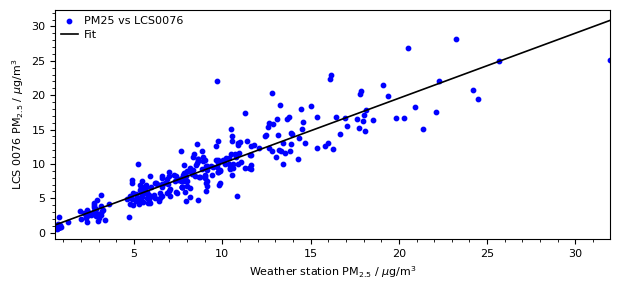

In [11]:
start_time = '2024-09-19 12:00'
end_time = '2024-09-19 17:20'

fig, ax = plt.subplots(figsize=(6.3, 3))

plot_reference_LCS(
    ax, 
    data, 
    ['PM25', 'LCS0076'], 
    start_time, 
    end_time, 
    ['Conc', 'SPS30_PM2.5'], 
    ['Weather station PM$_{2.5}$ / $\mu$g/m$^{3}$', 'LCS 0076 PM$_{2.5}$ / $\mu$g/m$^{3}$']
)
fig.tight_layout()
plt.show()
fig.savefig('LCS_vs_WS.png', dpi = 600)